<a href="https://colab.research.google.com/github/AtlanticoSquad2Ciclo3/TrilhaIntermediaria/blob/main/Apresenta%C3%A7%C3%A3o_Trilha_Intermediaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Setup do ambiente
!pip install -q --upgrade pip
# clone do repositório
!rm -r TrilhaIntermediaria
!git clone -q https://github.com/AtlanticoSquad2Ciclo3/TrilhaIntermediaria
%cd TrilhaIntermediaria
!pip install -q -r requirements.txt
%cd ..
import sys
sys.path.append('/content/TrilhaIntermediaria')

#download dos dados
!pip install -q gdown
!gdown -q https://drive.google.com/uc?id=1f2zdo1T82pagb-DolGssw_SphiLIbmHa -O dados.zip
!rm -r dados
!unzip -qo dados.zip
!rm dados.zip
!mv 'projeto 4' dados

     |████████████████████████████████| 2.0 MB 5.3 MB/s 
rm: cannot remove 'TrilhaIntermediaria': No such file or directory
/content/TrilhaIntermediaria
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 69.2 MB/s eta 0:00:00
/content
rm: cannot remove 'dados': No such file or directory


In [2]:
#@title Ingestão dos dados
from Pipelines.src.pipeline_utils import ingestao, sample_by_class, run_pipeline

dados = ingestao('dados')

# Introdução

Este projeto faz parte do Atlântico Academy Bootcamp e objetiva realizar a classificação das três espécies de plantas abaixo através da visão computacional.


| *Abies Concolor* | *Acer Campestre*  | *Amelanchier Canadensis* |
|--------|---------|--------|
| ![](https://drive.google.com/uc?export=view&id=19ddg3XB-awsP2Hk1VsnIxfGvDXCA7Sud) | ![](https://drive.google.com/uc?export=view&id=1q_rkaWKw8ometLwX4sfYoPVM5aBVooui) | ![](https://drive.google.com/uc?export=view&id=1QaVqmSg4AJScTNbzq01ZLyctW1ZsHD8t) |

Para construir e executar os três pipelines que apresentaremos a seguir, realizamos uma pesquisa no Researchgate e em plataformas digitais que exploram a visão computacional e suas principais ferramentas para classificação de folhas de plantas. A pesquisa é orientada através de Araujo *et al.* (2017) e Oktaviani *et al.* (2019) que resultam da requisição através das palavras-chaves *plant leaf*, folhas de plantas e classificação.

Integrantes do grupo que trabalharam ativamente nessa trilha:

*   Eduardo Façanha
*   Alan Victor
*   Lucas Matheus Silva Teixeira
*   Benedikt Reppin

## Sobre o dataset

O *dataset* do projeto é composto pela seguinte distribuição de espécies:

| Espécie                | qtd |
|------------------------|---------|
| Abies Concolor         | 51      |
| Acer Campestre         | 36      |
| Amelanchier Canadensis | 35      |
| **Total**              | **122** |

O *dataset* é constituído de imagens com o objeto de interesse centralizado, predominantemente em cores verdes, sobre um fundo branco. Contudo, as imagens divergem no padrão ao:

*   Não seguir um padrão na orientação de imagens

![](https://drive.google.com/uc?export=view&id=1VTwt5Ub1w3SsVwzaK_ksph4x1su97Zsz)


*   Não seguir um padrão no tamanho das imagens

| Largura  | Altura  | qtd  |
|-----|-----|----|
| 800 | 597 | 60 |
| 597 | 800 | 32 |
| 600 | 800 |  30 |
| **Total** |   |  **122** |

*   Não seguir um padrão na iluminação e no foco das imagens

![](https://drive.google.com/uc?export=view&id=1joAXSioRScGcDJErO6CEvuZxNk3ik0b0)


# Data Augmentation

# Formação do Dataset

## Balanceamento


# Pipelines

## Pipeline 1 - Binarização RGB não supervisionada

![](https://drive.google.com/uc?export=view&id=1GGBrjs4GGmOwf--pRjmwivXbyDvcncIn)

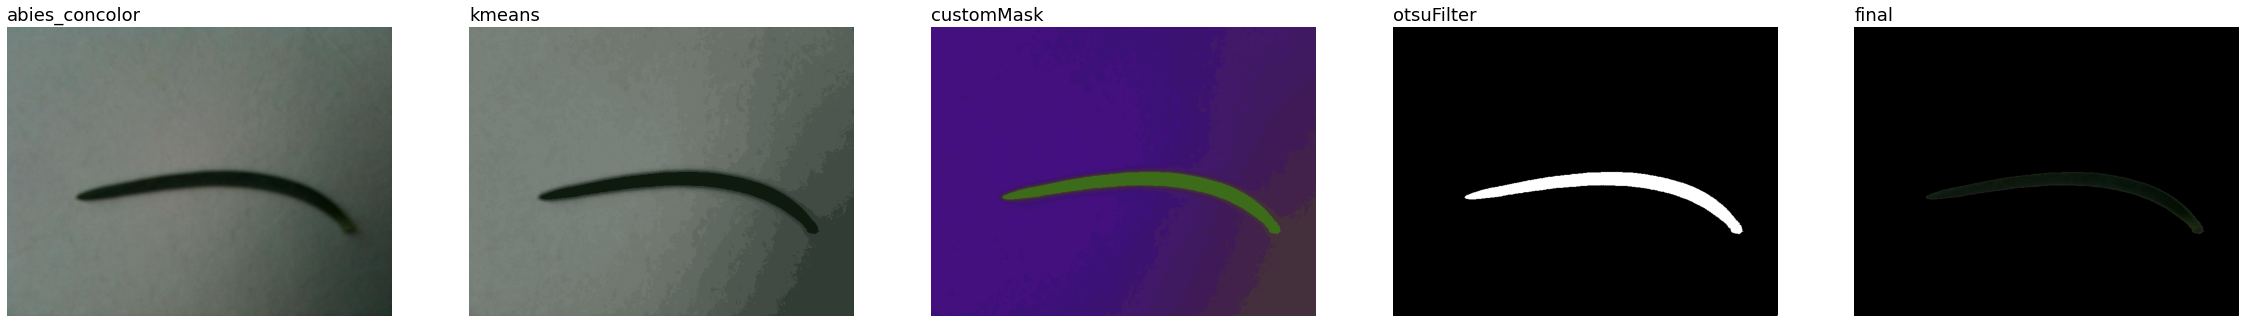

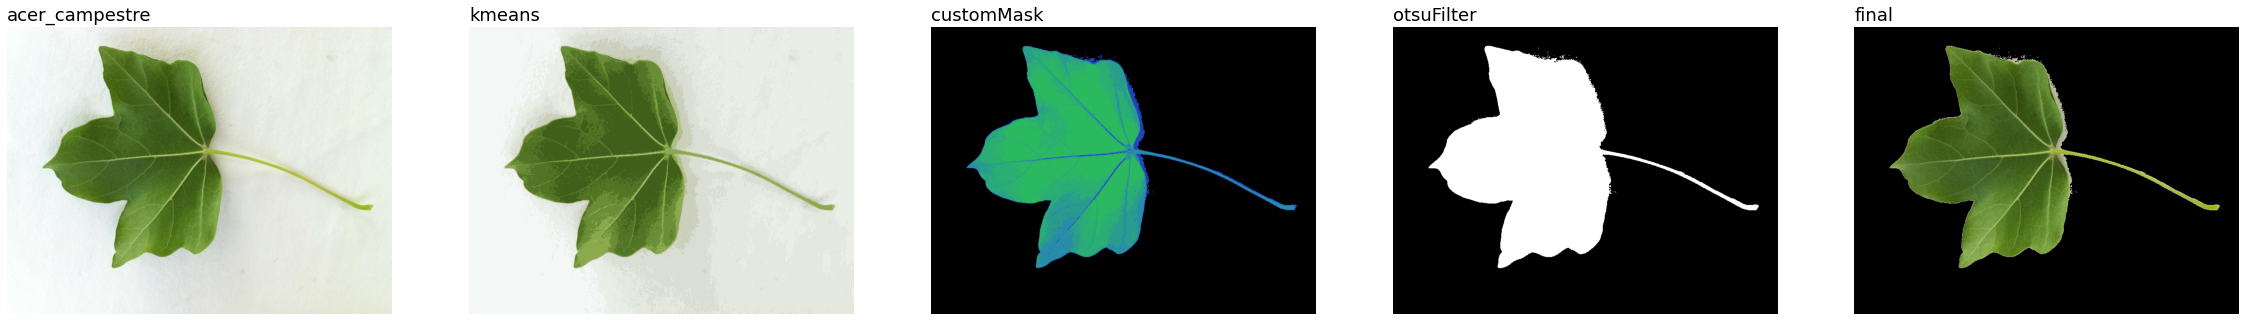

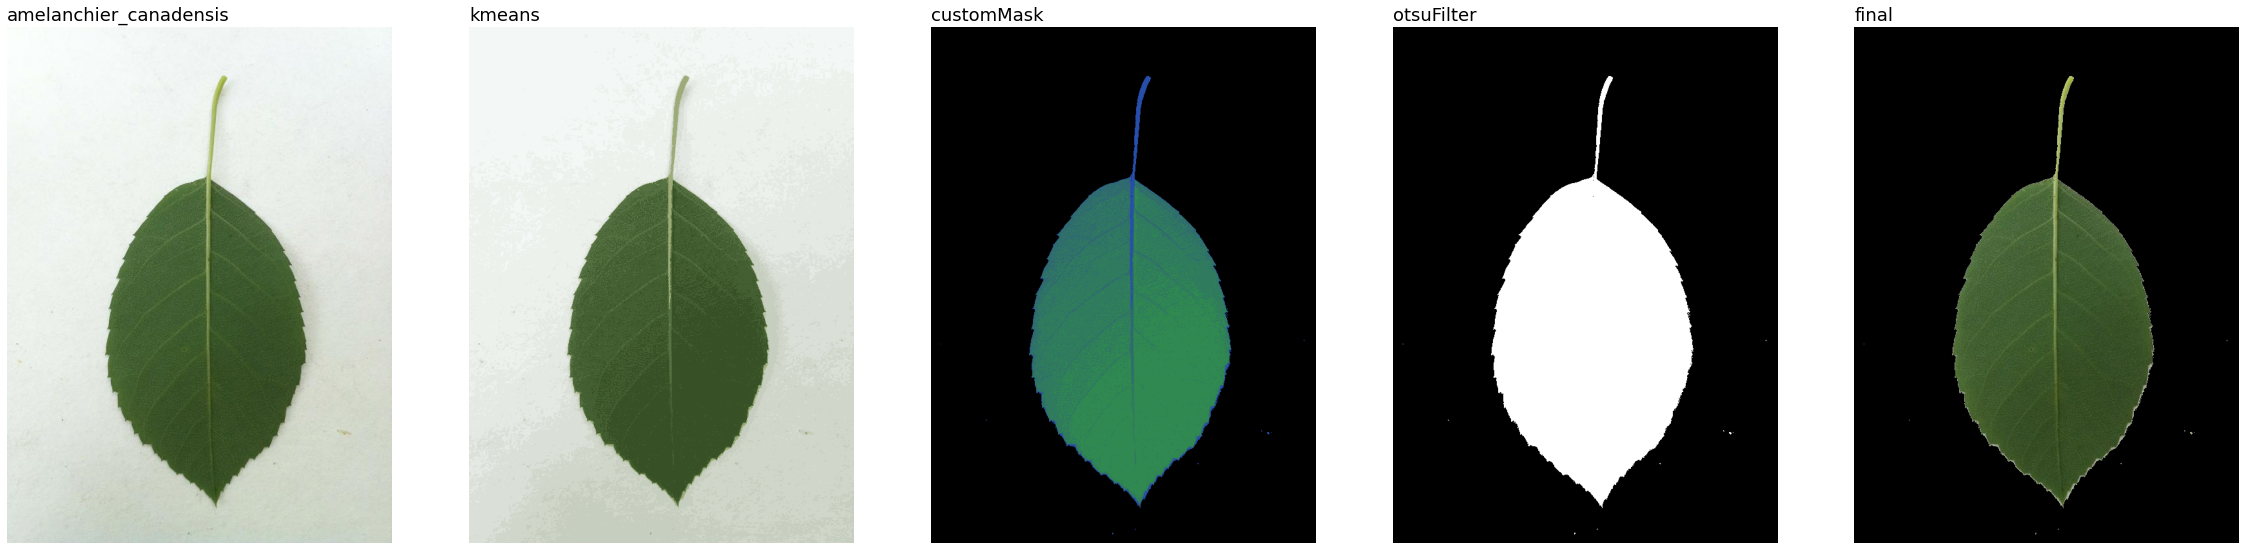

In [3]:
#@title Exemplos
#@markdown Kmeans
K = 10 #@param {type:"integer"}
max_iter = 100 #@param {type:"integer"}
epsilon = 0.85 #@param {type:"number"}
attempts = 10 #@param {type:"integer"}
import cv2
#@markdown Configuração da máscara HSI customizada
h_lower = 0. #@param {type:"number"}
h_upper = 0.5 #@param {type:"number"}
s_lower = 0 #@param {type:"number"}
s_upper = 1.0 #@param {type:"number"}
v_lower = 0 #@param {type:"number"}
v_upper = 0.8 #@param {type:"number"}

# h_lower = 0.2 #@param {type:"number"}
# h_upper = 0.5 #@param {type:"number"}
# s_lower = 0.19 #@param {type:"number"}
# s_upper = 1.0 #@param {type:"number"}
# v_lower = 0 #@param {type:"number"}
# v_upper = 1.0 #@param {type:"number"}
#@markdown Amostragem

amostras_por_classe = 1 #@param {type:"integer"}
from Pipelines.src.pipeline_utils import Pipeline1


kmeansArgs = {'K':K,
              'bestLabels':None,
              # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
              'criteria':(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon),
              'attempts':attempts,
              'flags':cv2.KMEANS_RANDOM_CENTERS}

customMaskArgs={'h_lower':h_lower,
                'h_upper':h_upper,
                's_lower':s_lower,
                's_upper':s_upper,
                'v_lower':v_lower,
                'v_upper':v_upper}


pipeline1 = Pipeline1(kmeansArgs=kmeansArgs,
                      customMaskArgs=customMaskArgs)


steps = ['kmeans', 'customMask', 'otsuFilter', 'final']
cmaps = ['gray',   'hsv',        'gray',       'gray']
samples = sample_by_class(dados,amostras_por_classe)
run_pipeline(samples, 
             transform=pipeline1.transform, 
             steps=steps, 
             show_img = True,
             cmaps=cmaps)

## Pipeline 2 - Delimitação com filtro bilateral


![](https://drive.google.com/uc?export=view&id=1hoxq38fdHhJKBHNew1J_-q8xMxXedfBM)

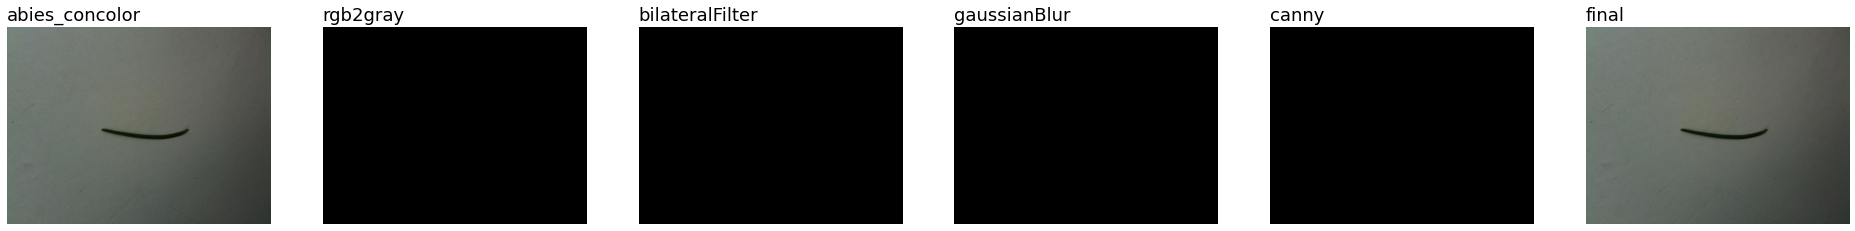

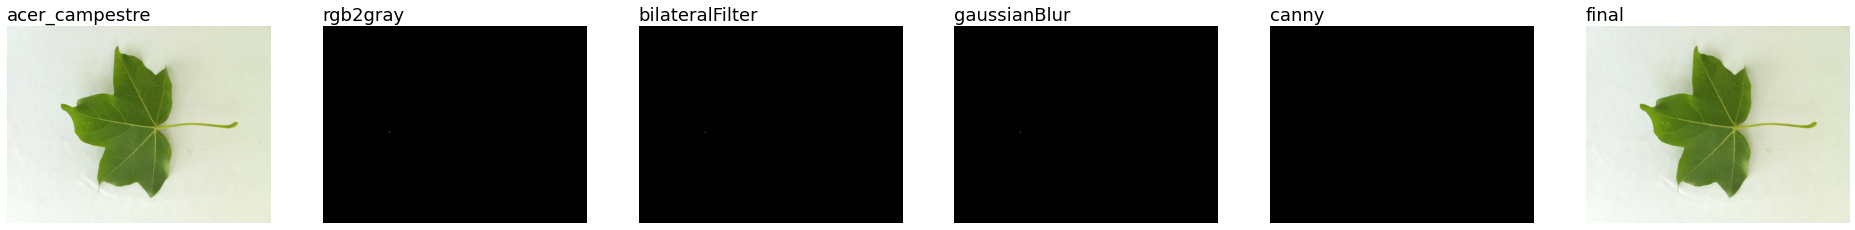

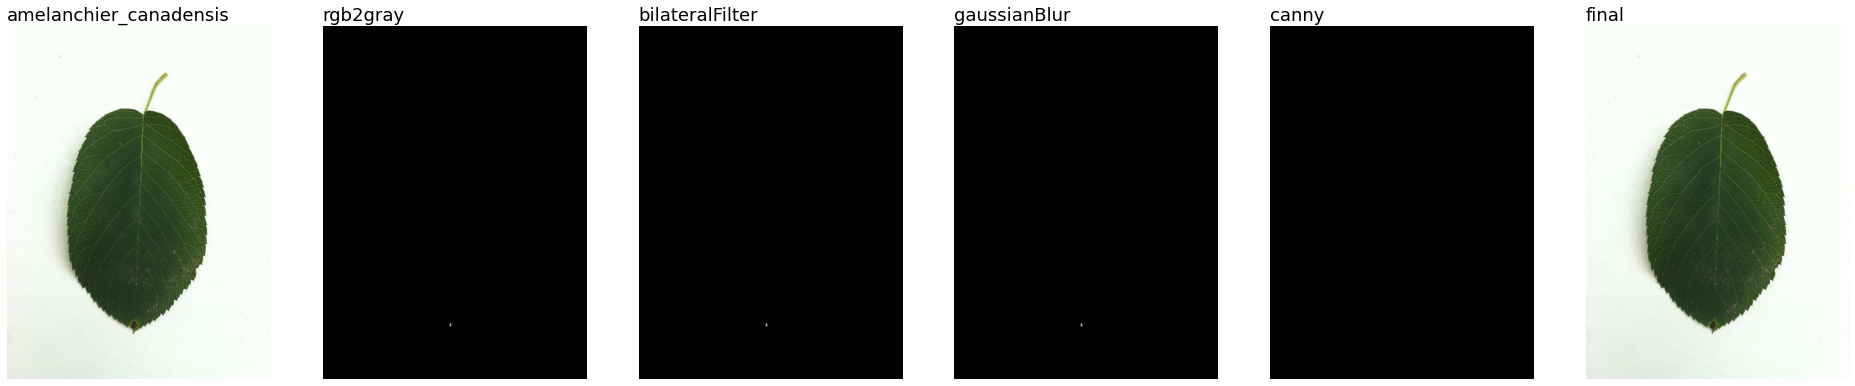

In [4]:
#@title Exemplos
#@markdown Pesos rgb2gray
default = False #@param {type:"boolean"}
r = 0.333 #@param {type:"number"}
g = -0.666 #@param {type:"number"}
b = 0.333 #@param {type:"number"}
rgb = [r,g,b]
if default:
  rgb = [0.2989,0.5870,0.1140]

#@markdown Configuração filtro bilateral
d = 1 #@param {type:"integer"}
sigmaColor = 21 #@param {type:"integer"}
sigmaSpace = 21 #@param {type:"integer"}

#@markdown Configuração Gaussian blur
bypass = True #@param {type:"boolean"}
ksize = 7 #@param {type:"integer"}
sigmaX = 21 #@param {type:"integer"}

#@markdown Configuração Canny
threshold1 = 70 #@param {type:"integer"}
threshold2 = 200 #@param {type:"integer"}


from Pipelines.src.pipeline_utils import Pipeline2

rgb2grayArgs = {"weights":rgb}

bilateralFilterArgs = {'d':d, 
                       'sigmaColor':sigmaColor,
                       'sigmaSpace':sigmaSpace}

gaussianBlurArgs = {'ksize':(ksize,ksize),
                    'sigmaX':sigmaX} if not bypass else {}

cannyArgs = {'threshold1':70, 
             'threshold2':200}


pipeline2 = Pipeline2(rgb2grayArgs = rgb2grayArgs,
                      bilateralFilterArgs = bilateralFilterArgs,
                      gaussianBlurArgs = gaussianBlurArgs,
                      cannyArgs = cannyArgs)

#@markdown Amostragem

amostras_por_classe = 1 #@param {type:"integer"}

steps = ['rgb2gray', 'bilateralFilter', 'gaussianBlur', 'canny','final']
samples = sample_by_class(dados,amostras_por_classe)
cmaps = ['gray','gray','gray','gray','gray']
run_pipeline(samples, 
             transform=pipeline2.transform, 
             steps=steps, 
             show_img = True,
             cmaps=cmaps)



## Pipeline 3 - Binarização grayscale

![](https://drive.google.com/uc?export=view&id=1tZlHjScXzj3amEm_g8pMvH2kYYc3kqNP)

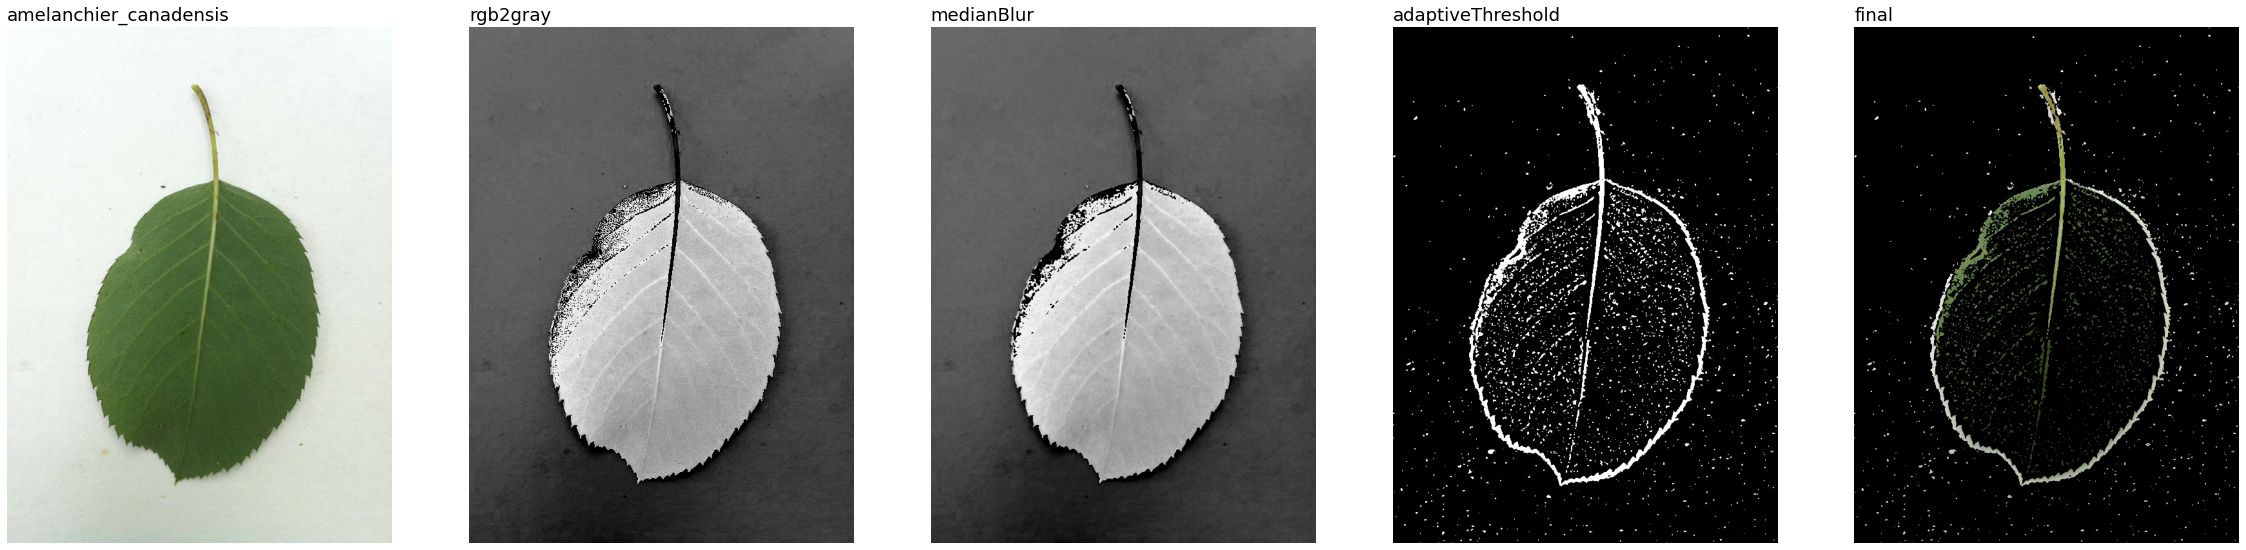

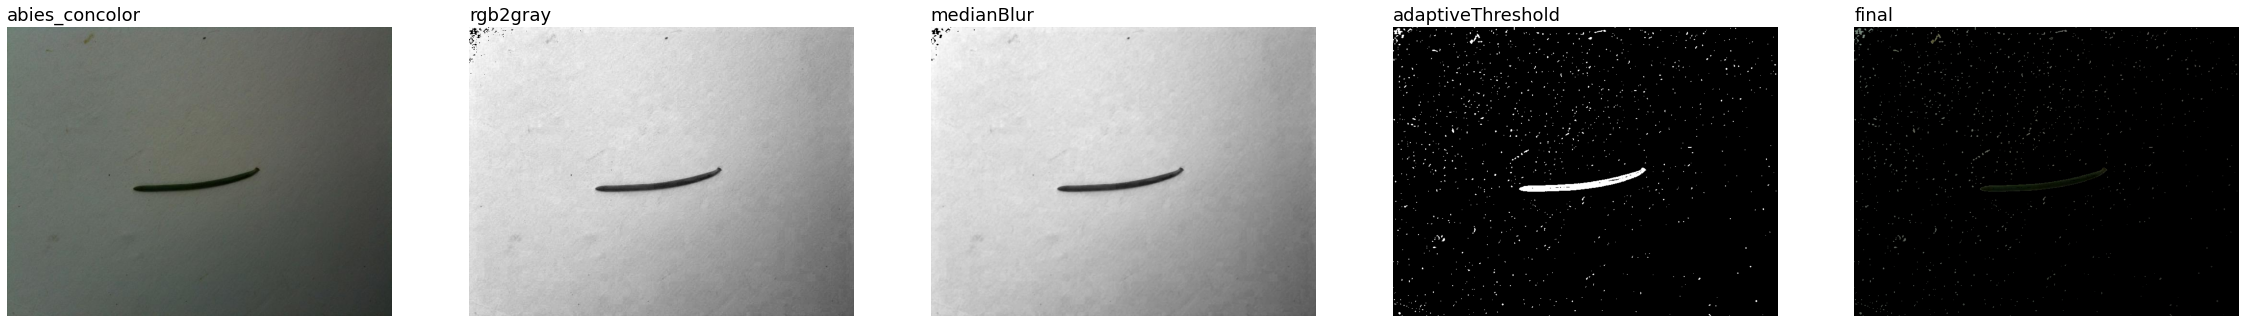

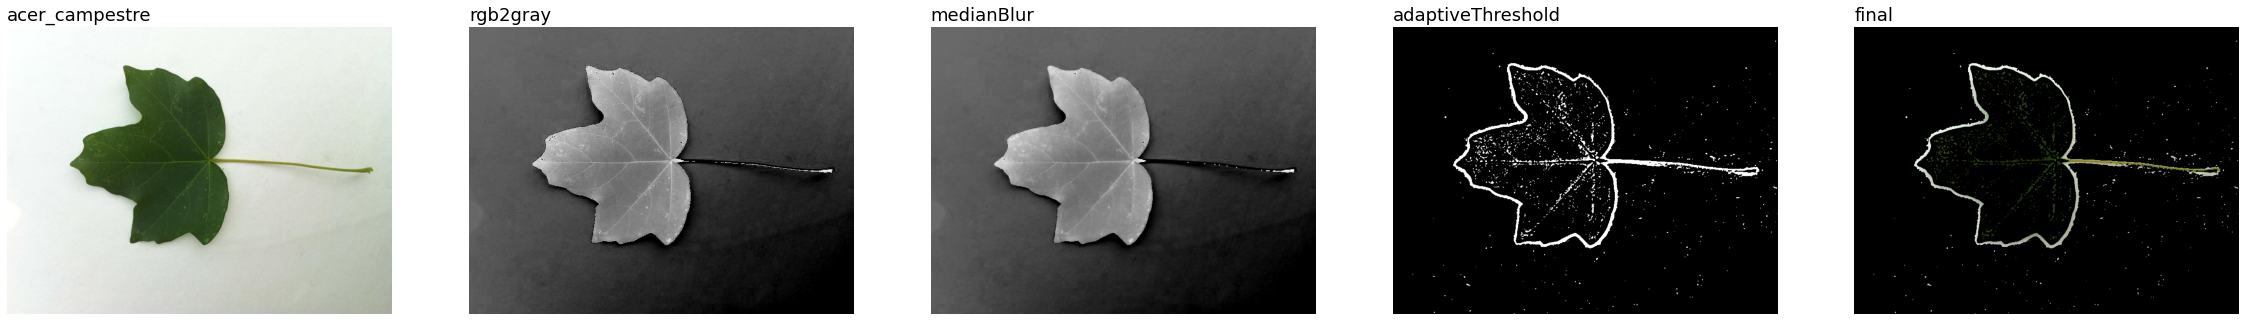

In [3]:
#@title Exemplos
#@markdown Pesos rgb2gray
default = False #@param {type:"boolean"}
r = -0.333 #@param {type:"number"}
g = 2 #@param {type:"number"}
b = -0.333 #@param {type:"number"}
rgb = [r,g,b]
if default:
  rgb = [0.2989,0.5870,0.1140]

#@markdown Configuração Median blur
ksize = 3 #@param {type:"integer"}

#@markdown Configuração Threshold adaptativo
blockSize = 21 #@param {type:"integer"}
C = 5 #@param {type:"integer"}


from Pipelines.src.pipeline_utils import Pipeline3

rgb2grayArgs = {"weights":rgb}


medianBlurArgs = {'ksize':ksize}
import cv2
adaptiveThresholdArgs = {'maxValue':255, 
                         'adaptiveMethod':cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                         'thresholdType':cv2.THRESH_BINARY_INV, 
                         'blockSize':blockSize, 
                         'C':C}


pipeline3 = Pipeline3(rgb2grayArgs = rgb2grayArgs,
                      medianBlurArgs = medianBlurArgs,
                      adaptiveThresholdArgs = adaptiveThresholdArgs)
#@markdown Amostragem

amostras_por_classe = 1 #@param {type:"integer"}

steps = ['rgb2gray','medianBlur','adaptiveThreshold','final']
samples = sample_by_class(dados,amostras_por_classe)
cmaps = ['gray','gray','gray','gray']
run_pipeline(samples, 
             transform=pipeline3.transform, 
             steps=steps, 
             show_img = True,
             cmaps=cmaps)


# Conclusão

Os 3 pipelines se mostaram eficientes no pré-processamento do *dataset* ao permitir detectar as diferentes espécies de folhas. 

Contudo, os três pipelines não apresentaram resultados consistentes nas imagens da espécie *Abies Concolor* devido ao desfoque em algumas imagens, sendo necessário o ajuste manual em alguns momentos para obter bons resultados em todas as imagens da espécie. 

# Referências

ARAÚJO, V.; BRITTO, A. S.; BRUN, A. L.; KOERICH, A. L.; PALATE, R. **Multiple classifier system for plant leaf recognition**. IEEE International Conference on Systems, Man and Cybernetics. Banfim: IEEE, 2017. Disponível em: https://ieeexplore.ieee.org/document/8122891/. Acesso em: 14 set. 2022.

CHAUHAN, N. S. Introduction to Image Segmentation with K-Means clustering. KDNuggets, 2019. Disponível em: https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html. Acesso em: 14 set. 2022.

EDEZA, T. Image Processing with Python — Color Isolation for Beginners.  Towards Data Science, 2021. Disponível em: https://towardsdatascience.com/image-processing-with-python-color-isolation-for-beginners-3b472293335b. Acesso em: 14 set. 2022.

EHIAGHE, A. What Image Processing Techniques Are Actually Used in the ML Industry? **Neptune Labs**, 2022. Disponível em: https://neptune.ai/blog/what-image-processing-techniques-are-actually-used-in-the-ml-industry. Acesso em: 14 set. 2022.

MOHAN, S. Bilateral Filtering in Python OpenCV with cv2.bilateralFilter(). **MLK**, 2020. Disponível em: https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/. Acesso em: 14 set. 2022.

OKTAVIANI, O.; MADENDA, S.; RODIAH, R.; SUSENTIANIGTIAS, D. R.; F.; ADLINA, D.; ARIANTY, R. Combination of Chain Code and Leaf Morphology Approach for Plant Identification. [*s.l*]: SAR Journal, vol. 2, issue 3, p. 89-95, 2019. DOI: 10.18421/SAR23-01. Disponível em: http://www.sarjournal.com/content/23/SARJournalSeptember2019_89_95.html. Acesso em: 14 set. 2022.

TOMASI, C.; MANDUCHI, R. **Bilateral filtering for gray and color images**. Sixth International Conference on Computer Vision (IEEE Cat. No.98CH36271), 1998. pp. DOI: 10.1109/ICCV.1998.710815. 

VISÃO Computacional. **Salesforce Trailhead**, 2022. Disponível em: https://atlantico.my.trailhead.com/pt-BR/content/bootcamp_computacao_cognitiva/modules/visao__computacional.  Acesso em: 14 set. 2022.

<!-- 

* Grayscale

Explicação da técnica.

Imagens preto e branco são compostas por uma matriz de duas dimensões, com cada cada pixel correspondendo a um valor que varia de 0(preto) a 255(branco). 

Já imagens coloridas são compostas de 3 matrizes que correspondem a cada cor do sistema RGB. No caso destas, cada pixel é representado por uma tupla (r,g,b), onde (0,0,0) representa preto e (255,255,255) representa branco.
Por que usar?
Sabendo disso, é possível notar que a transformação das imagens coloridas para tons cinzas facilita o posterior processamento da imagem, uma vez que o número de canais a serem trabalhados passa de 3 para 1.
Para o nosso trabalho, esse processo tornará menos oneroso o processamento das imagens.

* Suavização (smoothing)
Explicação da técnica

Refere-se a um efeito de blurr (borrão) que causa “borrões” na imagem, permitindo destacar regiões da imagem. É bem útil quando se pretende detectar bordas posteriormente.
Esse efeito pode ser alcançado ao se fazer uma “mistura” de um pixel central com os adjacentes. Os métodos para realizar essa mistura podem ser a partir:
Da média: onde se define um número quadrado ímpar de pixels (para garantir a existência de um pixel central), no qual o valor do pixel central é substituído pela média simples dos valores dos pixels adjacentes.
Da mediana: similar ao anterior, mas aqui a substituição do valor é pela mediana dos valores adjacentes.
Por que usar?
Para o nosso trabalho, esse processo permitirar uma melhor definição das bordas das folhas e, posteriormente, seu formato; característica essa que mais se destaca entre uma espécie e outra.

* Binarização

Consiste em definir um valor de limiar(*threshhold*) e compará-lo pixel a pixel da imagem em escala de cinza. Valores que estejam acima do limiar são maximizados, ou seja, transformados em branco; enquanto valores abaixo do limiar são minimizados, ou seja, transformados em preto. Dessa forma, será obtida uma imagem totalmente preta e branca que espera-se que apresente bordas mais bem definidas e destaque para os pontos principais que se quer trabalhar.
O valor desse limiar pode ser definido anteriormente, ou calculado ao longo da imagem para se obter um melhor resultado. Além disso, esse limiar calculado pode sê-lo de formal global ou local, sendo esta última mais recomendada para evitar que sejam destacados pontos em que não se tem interesse.
Para o nosso trabalho, é importante destacar a imagem central das folhas eliminando background e outros elementos que possam atrapalhar suas análises e identificação, e a binarização contribui bastante para esse ponto.



## Ingestão dos dados

Para realizar a ingestão dos dados, inicialmente, criamos a função *ingestão* para criar um *dataframe* com o caminho do arquivo e para escalonar as imagens reduzindo o tamanho das imagens. Assim, podemos identificar a classe de cada imagem de acordo a pasta em que o arquivo foi salvo.

###  Leitura da imagem
Após isso, utilizamos um *apply* para aplicar a leitura do arquivo pelo **cv2.imread()** a imagem em convertendo em um *array numpy* no shape de "(altura, largura, números de canais)".

MOSTRAR EXEMPLO

### Padronização das imagens 

#### Padronização da orientação
Para realizar a padronização da imagem, criamos uma coluna *img_size* e a função *orientação* para verificar a orientação das imagens caso estejam na horizontal ou vertical. 

|   |   |   |   |
|-----|-----|---|----|
| 800 | 597 | 3 | 60 |
| 597 | 800 | 3 | 32 |
| 600 | 800 | 3 | 30 |

Após detectar as imagens que estavam na orientação vertical, utilizamos a biblioteca OpenCV através da função cv2.rotate() para rotacionar as imagens em 90° e padronizar a orientação.

Antes da função:
|   |   |
|------------|----|
| horizontal | 62 |
| vertical   | 60 |

Depois da função:
|   |   |
|------------|----|
| horizontal | 122 |

#### Padronização do tamanho da imagem
Para realizar a padronização do tamanho da imagem, adicionamos 3 pixels de altura na borda da imagem, especificamente adicionando 2 pixels acima e 1 pixel abaixo da imagem utilizando o np.pad().

|   |   |   |   |
|-----|-----|---|----|
| 600 | 800 | 3 | 122 |

#### Escalonamento
Para deixar os dados menores mas sem perder uma grande quantidade de informações, realizamos o *scale* em 0.5 reduzindo o tamanho da imagem pela metade. Assim, as novas informações sobre o dataframe são:

|   |   |   |   |
|-----|-----|---|----|
| 300 | 400 | 3 | 122 |
-->